In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def read_data(drunkfile, normalfile):
    drunk = pd.read_csv("drunk.csv")
    normal = pd.read_csv("normal.csv")
    data = pd.concat([drunk, normal])
    ans_list = [1] * len(drunk) + [0] * len(normal)
    return np.array(data[['smile','anger','contempt','disgust','fear','happiness','neutral','sadness','surprise','eyeOccluded']].values), np.array(ans_list)

In [3]:
x_data, y_data = read_data("model/drunk.csv", "model/normal.csv")
print(x_data.shape)
print(y_data.shape)

(1323, 10)
(1323,)


In [4]:
x_data[x_data == True] = 1
x_data[x_data == False] = 0

In [5]:
from sklearn.utils import shuffle
(x_data, y_data) = shuffle(x_data, y_data)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 10)
(331, 10)
(992,)
(331,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(input_dim = x_train.shape[1], units = 10, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

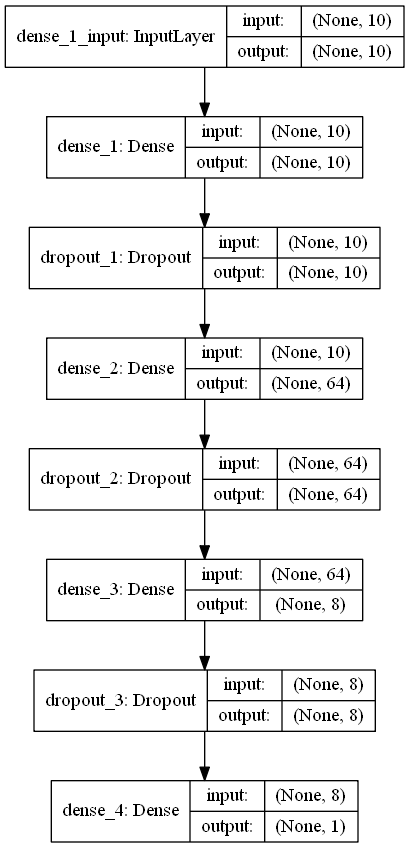

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history = model.fit(x_train, y_train, batch_size = 8, epochs = 25, validation_split = 0.2)

Train on 793 samples, validate on 199 samples
Epoch 1/25
793/793 [==============================] - 1s 1ms/step - loss: 0.6264 - accuracy: 0.6507 - val_loss: 0.6325 - val_accuracy: 0.6181
Epoch 2/25
793/793 [==============================] - 0s 340us/step - loss: 0.6150 - accuracy: 0.6608 - val_loss: 0.6282 - val_accuracy: 0.6181
Epoch 3/25
793/793 [==============================] - 0s 331us/step - loss: 0.6036 - accuracy: 0.6658 - val_loss: 0.6263 - val_accuracy: 0.6181
Epoch 4/25
793/793 [==============================] - 0s 340us/step - loss: 0.5989 - accuracy: 0.6797 - val_loss: 0.6162 - val_accuracy: 0.6533
Epoch 5/25
793/793 [==============================] - 0s 358us/step - loss: 0.5994 - accuracy: 0.6873 - val_loss: 0.6125 - val_accuracy: 0.6633
Epoch 6/25
793/793 [==============================] - 0s 316us/step - loss: 0.5886 - accuracy: 0.6898 - val_loss: 0.6059 - val_accuracy: 0.6683
Epoch 7/25
793/793 [==============================] - 0s 345us/step - loss: 0.5893 - accurac

In [10]:
scores = model.evaluate(x_test, y_test)
print(scores)

331/331 [==============================] - 0s 42us/step
[0.47357633853967096, 0.8126888275146484]


In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

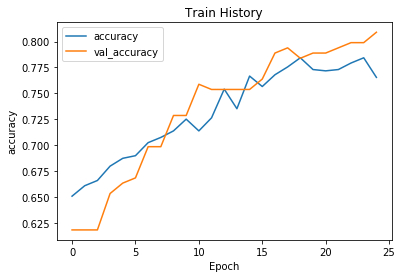

In [12]:
show_train_history(train_history,'accuracy' ,'val_accuracy' )

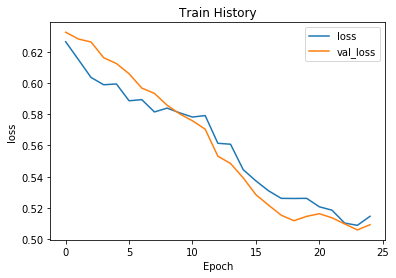

In [13]:
show_train_history(train_history, 'loss', 'val_loss')